In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#압축풀기
import zipfile

local_zip = '/content/drive/MyDrive/데이터저장/대회/따릉이 (1).zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
df = pd.read_csv('/content/╡√╕¬└╠/train.csv')
df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


# 데이터 분석

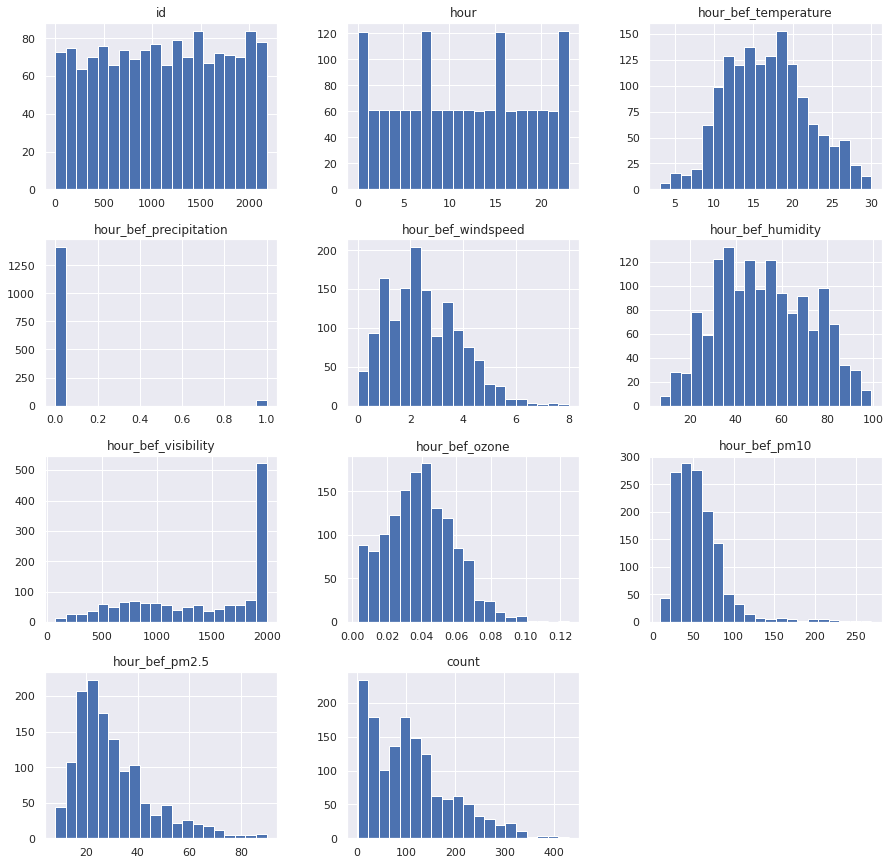

In [5]:
df.hist(figsize=(15,15), bins=20)

plt.show()

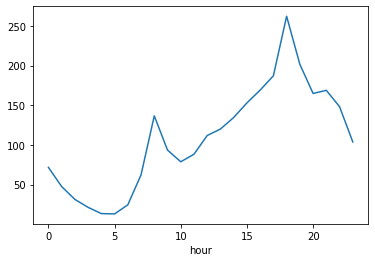

In [ ]:
#시간에 따른 따릉이 대여수 확인

df.groupby('hour').mean()['count'].plot()

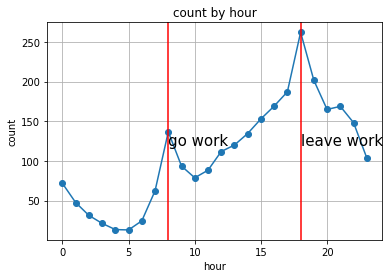

In [ ]:
#자세히 확인하기

plt.plot(df.groupby('hour').mean()['count'], 'o-')
plt.grid()
plt.title('count by hour')
plt.xlabel('hour')
plt.ylabel('count')

plt.axvline(8, color='r')
plt.axvline(18, color='r')

plt.text(8,120, 'go work', fontsize=15)
plt.text(18,120, 'leave work', fontsize=15)

plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

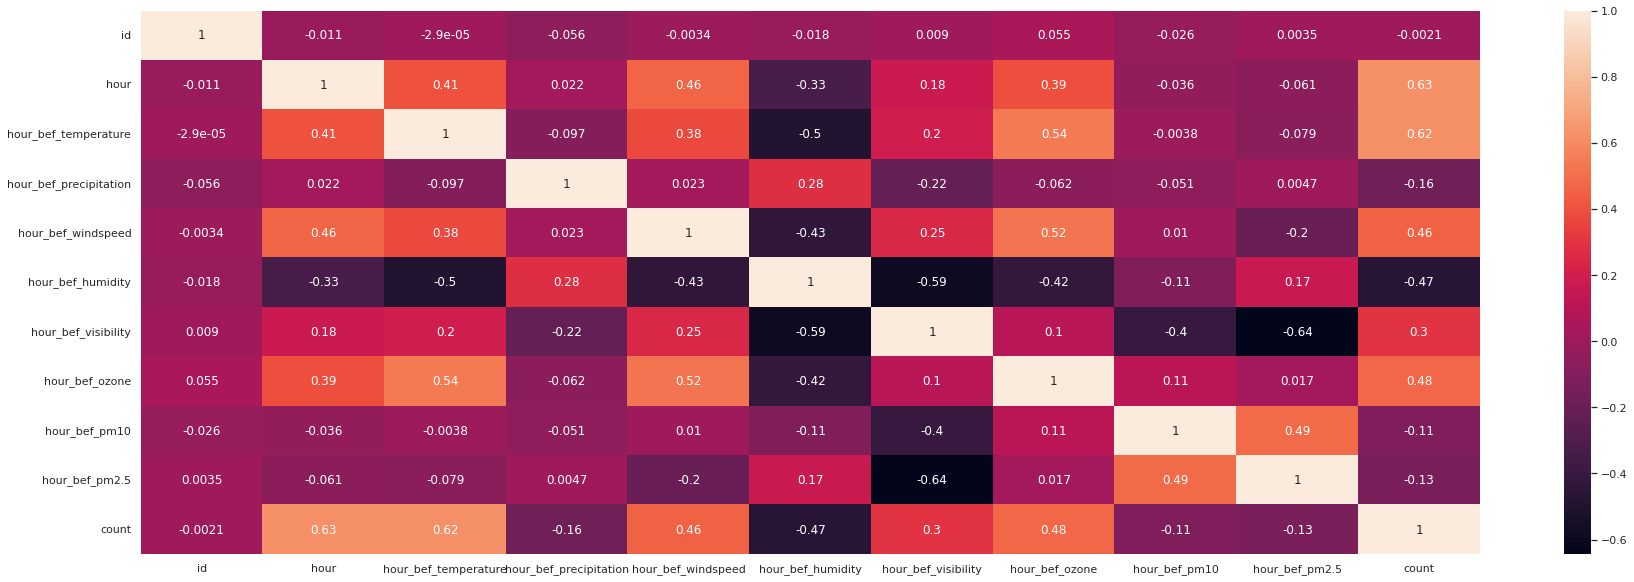

In [7]:
#heatmap을 이용해 각 데이터끼리 관계 보기

plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot=True, cmap='rocket')

plt.xticks(rotation=360)


# 결측치 처리

In [8]:
df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [9]:
#hour_bef_temperature  결측치 처리
#시간별 평균값으로 결측치 처리하기
df.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [10]:
df[df['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
df['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace=True)

In [12]:
df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [13]:
#hour_bef_windspeed 결측치 처리
df.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [14]:
df[df['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [15]:
df['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 
                                 934:1.965517, 1035:3.838333,1138:2.766667,1229:1.633333}, inplace=True)

In [16]:
df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [17]:
#hour_bef_visibility 결측치 처리
df.groupby('hour').mean()['hour_bef_visibility']

hour
0     1434.220339
1     1400.852459
2     1374.278689
3     1326.311475
4     1264.606557
5     1203.426230
6     1146.229508
7     1150.311475
8     1152.868852
9     1189.098361
10    1291.295082
11    1358.868852
12    1469.606557
13    1512.266667
14    1519.721311
15    1528.065574
16    1566.583333
17    1561.733333
18    1581.850000
19    1576.688525
20    1565.557377
21    1590.016667
22    1512.081967
23    1462.508197
Name: hour_bef_visibility, dtype: float64

In [18]:
df[df['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0


In [19]:
df['hour_bef_visibility'].fillna({934:1434.220339, 1035:1581.850000}, inplace=True)

In [20]:
df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         0
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [21]:
#hour_bef_ozone 결측치 처리
df.groupby('hour').mean()['hour_bef_ozone']

hour
0     0.033763
1          NaN
2     0.030492
3     0.031213
4     0.031984
5     0.031623
6     0.029317
7     0.025300
8     0.021197
9     0.021492
10    0.025167
11    0.030367
12    0.036817
13    0.045203
14    0.053344
15    0.057400
16    0.060579
17    0.060362
18    0.058508
19    0.053967
20    0.048279
21    0.043517
22    0.038066
23    0.035148
Name: hour_bef_ozone, dtype: float64

In [22]:
df['hour_bef_ozone'].fillna(df['hour_bef_ozone'].mean(), inplace=True)

In [23]:
df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         0
hour_bef_ozone              0
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [24]:
#hour_bef_precipitation 결측치 처리
df.groupby('hour').mean()['hour_bef_precipitation']

hour
0     0.016949
1     0.049180
2     0.049180
3     0.032787
4     0.016393
5     0.016393
6     0.016393
7     0.016393
8     0.032787
9     0.016393
10    0.016393
11    0.000000
12    0.016393
13    0.016667
14    0.065574
15    0.065574
16    0.050000
17    0.100000
18    0.016667
19    0.032787
20    0.049180
21    0.016667
22    0.032787
23    0.016393
Name: hour_bef_precipitation, dtype: float64

In [25]:
df[df['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,1434.220339,0.039149,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,1581.850000,0.039149,NaN,NaN,1.0


In [26]:
df['hour_bef_precipitation'].fillna({934:0.016949,1035:0.016667}, inplace=True)

In [27]:
df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         0
hour_bef_ozone              0
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

# 데이터분리

In [28]:
X_data = df.drop('count', axis=1)
y_data = df['count']

In [29]:
X_data.shape

(1459, 10)

In [30]:
y_data.shape

(1459,)

In [31]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 114.1 KB


In [32]:
# 필요없는 열 삭제
X_data.drop(columns = ['id','hour_bef_humidity', 'hour_bef_pm10', 'hour_bef_pm2.5'],axis=1, inplace=True)

In [33]:
X_data.shape

(1459, 6)

In [51]:
X_data.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_visibility       0
hour_bef_ozone            0
dtype: int64

# train, test 분리 및 scale

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=0)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1313, 6) (146, 6) (1313,) (146,)


In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std= StandardScaler()
minmax=MinMaxScaler()

X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [37]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,0.499354,0.506059,0.033537,0.310307,0.690075,0.299002
std,0.300628,0.196733,0.180032,0.170878,0.304285,0.155956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217391,0.358209,0.000000,0.175000,0.417794,0.196721
50%,0.521739,0.500000,0.000000,0.300000,0.780957,0.296303
75%,0.739130,0.634328,0.000000,0.425000,0.996358,0.393443
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [148]:
log.score(X_train,y_train)

0.035034272658035034

In [149]:
log.score(X_test, y_test)

0.00684931506849315

In [153]:
acc_log_test = round(log.score(X_test,y_test)*100,2)
print(acc_log_test)

0.68


# SVM

In [ ]:
from sklearn.svm import LinearSVC
svc=LinearSVC()

svc.fit(X_train,y_train)

print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.05483625285605483
0.0136986301369863


In [156]:
from seaborn.axisgrid import Grid
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm =SVC()
param=[
    {'kernel':['rbf'],'C':[0.1,1,5,10,20,30,60,100,300,500,],'gamma':[0.001,0.01,0.1,1.,10.,30.,100.]}
]

gs= GridSearchCV(svm,
                 param_grid=param,
                 cv=2,
                 scoring='accuracy'
                 )

gs.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 5, 10, 20, 30, 60, 100, 300, 500],
                          'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [157]:
svm_best = gs.best_estimator_
print(svm_best)

print(gs.best_score_)

SVC(C=20, gamma=1.0)
0.03198899283513383


In [158]:
print(svm_best.score(X_train, y_train))
print(svm_best.score(X_test, y_test))

0.1744097486671744
0.0136986301369863


In [159]:
acc_svm_test = round(svm_best.score(X_test,y_test)*100, 2)
print(acc_svm_test)

1.37


# DecisionTree

In [69]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=4,
                            max_depth=5,
                            min_samples_leaf= 4,
                            )

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [70]:
print(dt.score(X_train,y_train))
print(dt.score(X_test, y_test))

0.7385183885987605
0.6938358669836171


In [160]:
from sklearn.tree import DecisionTreeRegressor

depth = [1,2,3,4,5,6,7,8,9]
save_dt =[]

for i in depth:
  dt_2 = DecisionTreeRegressor(max_depth=i)
  dt_2.fit(X_train, y_train)
  save_dt.append(dt_2)


In [161]:
for i in range(len(depth)):
  print('{}: '.format(i),save_dt[i].score(X_test, y_test))

0:  0.2601409000003875
1:  0.47359460864323155
2:  0.604672542756735
3:  0.6581371807563319
4:  0.7043143654616886
5:  0.7299821254409211
6:  0.7101273226095997
7:  0.7025373183450221
8:  0.6858909818266294


In [162]:
acc_dt_test=round(save_dt[5].score(X_test,y_test)*100,2)
acc_dt_test

73.0

In [ ]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()

param = {'max_depth':[10,15,20,30,40,50],
         'min_samples_split':[4,5,6,7,8,9,10],
         'min_samples_leaf':[4,5,6,7,8,9,10]
         }

gs = GridSearchCV(dt,
                  param_grid= param,
                  cv=3,
                  scoring='accuracy',
                  n_jobs=4,
                  verbose=2
                  )

gs.fit(X_train, y_train)

In [68]:
dt_best = gs.best_estimator_
print(dt_best)
print(gs.best_score_)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=4)
nan


In [ ]:
print(gs.score(X_train,y_train))
print(gs.score(X_test, y_test))

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(100)

rf.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.966580019169393
0.806293007354133


In [163]:
arr = [50,100,200,300,400,500,600,700,800,900,1000]
save_rf = []

for i in range(len(arr)):
  rf_2 = RandomForestRegressor(n_estimators=arr[i])
  rf_2.fit(X_train, y_train)
  save_rf.append(rf_2)

In [164]:
score = []
for j in range(len(arr)):
  score.append(save_rf[j].score(X_test, y_test))
  print('{}:'.format(arr[j]),save_rf[j].score(X_test, y_test))


50: 0.8184196184465027
100: 0.8123960959443872
200: 0.8120590708189585
300: 0.8095079885790611
400: 0.8119660950879695
500: 0.8151818585112237
600: 0.8136213227599037
700: 0.8121017972586406
800: 0.8098323091409274
900: 0.8147846681586987
1000: 0.8110194409116825


In [139]:
print(max(score))
print(score[1])

0.81776687426749
0.81776687426749


In [172]:
acc_rf_test=round(save_rf[1].score(X_test,y_test)*100,2)
acc_rf_test

81.24

# Ada boost

In [122]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=9,)

ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=9)

In [123]:
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.7176756740900526
0.6803771481009127


In [166]:
arr = [1,3,5,7,9,15,20,35,90,100]
save_ada= []


for i in range(len(arr)):
  ada2= AdaBoostRegressor(n_estimators=arr[i])
  ada2.fit(X_train,y_train)
  save_ada.append(ada2)

In [167]:
score=[]

for j in range(len(arr)):
  score.append(save_ada[j].score(X_test, y_test))
  print('{}: '.format(arr[j]), save_ada[j].score(X_test, y_test) )

1:  0.5729119155632203
3:  0.6024864773482943
5:  0.6564328028482227
7:  0.6630041563176082
9:  0.6142163978887889
15:  0.6797348723120498
20:  0.6661094508782623
35:  0.6273666680376412
90:  0.5069911123565416
100:  0.5069118944587799


In [168]:
print(max(score))

0.6797348723120498


In [171]:
acc_ada_test=round(save_ada[5].score(X_test,y_test)*100,2)
acc_ada_test

67.97

# KNN

In [144]:
from sklearn.neighbors import KNeighborsRegressor

kn_model=KNeighborsRegressor(n_neighbors=7)

kn_model.fit(X_train,y_train)

print('train score : {:.3f}'.format(kn_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(kn_model.score(X_test, y_test)))

train score : 0.782
test socre : 0.774


In [142]:
K = np.arange(1, 100)
train_result = np.zeros(len(K))             # 빈공간 생성
test_result = np.zeros(len(K))
for i, k in enumerate(K):
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1).fit(X_train, y_train)
    # print('학습 결과: ', model.score(X_train, y_train))
    # print('테스트 결과: ', model.score(X_test, y_test))
    train_result[i] = model.score(X_train, y_train)
    test_result[i] = model.score(X_test, y_test)
print('가장 높은 학습결과는: ', train_result.max())
print('학습결과가 가장 높게하는 K는: ', K[np.where(train_result == train_result.max())])
print('가장 높은 테스트결과는: ', test_result.max())
print('테스트결과가 가장 높게하는 K는: ', K[np.where(test_result == test_result.max())])

가장 높은 학습결과는:  1.0
학습결과가 가장 높게하는 K는:  [1]
가장 높은 테스트결과는:  0.774127945004946
테스트결과가 가장 높게하는 K는:  [7]


In [145]:
acc_knn_test=round(kn_model.score(X_test,y_test)*100,2)
acc_knn_test

77.41

# 점수 종합하기

In [174]:
models= pd.DataFrame({'Model':['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Ada boost', 'KNN'],
                      'Score':[acc_log_test, acc_svm_test, acc_dt_test, acc_rf_test, acc_ada_test, acc_knn_test]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,81.24
5,KNN,77.41
2,Decision Tree,73.00
4,Ada boost,67.97
1,SVM,1.37
0,Logistic,0.68


# 실제 적용하기

In [220]:
df_test = pd.read_csv('/content/╡√╕¬└╠/test.csv')

In [221]:
df_test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [222]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


## 전처리

In [223]:
df_test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [224]:
# 필요없는 열 삭제
df_test.drop(columns = ['id','hour_bef_humidity', 'hour_bef_pm10', 'hour_bef_pm2.5'],axis=1, inplace=True)

In [225]:
df_test.isnull().sum()

hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_visibility        1
hour_bef_ozone            35
dtype: int64

## 결측치 처리

In [226]:
df_test[df_test['hour_bef_temperature'].isna()]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_visibility,hour_bef_ozone
653,19,NaN,NaN,NaN,NaN,NaN


In [227]:
df_test[df_test['hour_bef_precipitation'].isna()]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_visibility,hour_bef_ozone
653,19,NaN,NaN,NaN,NaN,NaN


In [228]:
df_test[df_test['hour_bef_windspeed'].isna()]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_visibility,hour_bef_ozone
653,19,NaN,NaN,NaN,NaN,NaN


In [229]:
df_test[df_test['hour_bef_visibility'].isna()]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_visibility,hour_bef_ozone
653,19,NaN,NaN,NaN,NaN,NaN


In [230]:
df_test.groupby('hour').mean()['hour_bef_temperature'][19]

26.110344827586207

In [231]:
df_test.groupby('hour').mean()['hour_bef_precipitation'][19]

0.06896551724137931

In [232]:
df_test.groupby('hour').mean()['hour_bef_windspeed'][19]

3.5413793103448277

In [233]:
df_test.groupby('hour').mean()['hour_bef_visibility'][19]

1561.7586206896551

In [234]:
df_test['hour_bef_temperature'].fillna({653:26.110344827586207},inplace=True)

df_test['hour_bef_precipitation'].fillna({653:0.06896551724137931},inplace=True)

df_test['hour_bef_windspeed'].fillna({653:3.5413793103448277},inplace=True)

df_test['hour_bef_visibility'].fillna({653:1561.7586206896551},inplace=True)

In [235]:
df_test['hour_bef_ozone'].fillna(df_test['hour_bef_ozone'].mean(), inplace=True)

In [236]:
df_test.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_visibility       0
hour_bef_ozone            0
dtype: int64

## 예측하기

In [237]:
df_y = pd.read_csv('/content/╡√╕¬└╠/submission.csv')

In [238]:
df_y

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


### random forest

In [239]:
y_pred_rf= save_rf[1].predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [203]:
df_y['count'] = y_pred_rf

In [204]:
df_y

,id,count
0,0,278.43
1,1,278.43
2,2,263.24
3,4,277.94
4,5,263.70
...,...,...
710,2148,278.43
711,2149,278.43
712,2165,277.97
713,2166,277.94


In [206]:
#csv 파일로 저장
df_y.to_csv('./따릉이 예측(random forest)_1.csv', index=False)

### knn

In [243]:
df_y = pd.read_csv('/content/╡√╕¬└╠/submission.csv')

In [244]:
y_pred_knn= kn_model.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [245]:
df_y['count'] = y_pred_knn

In [246]:
#csv 파일로 저장
df_y.to_csv('./따릉이 예측(knn)_1.csv', index=False)